KNN Accuracy with k=5: 0.800


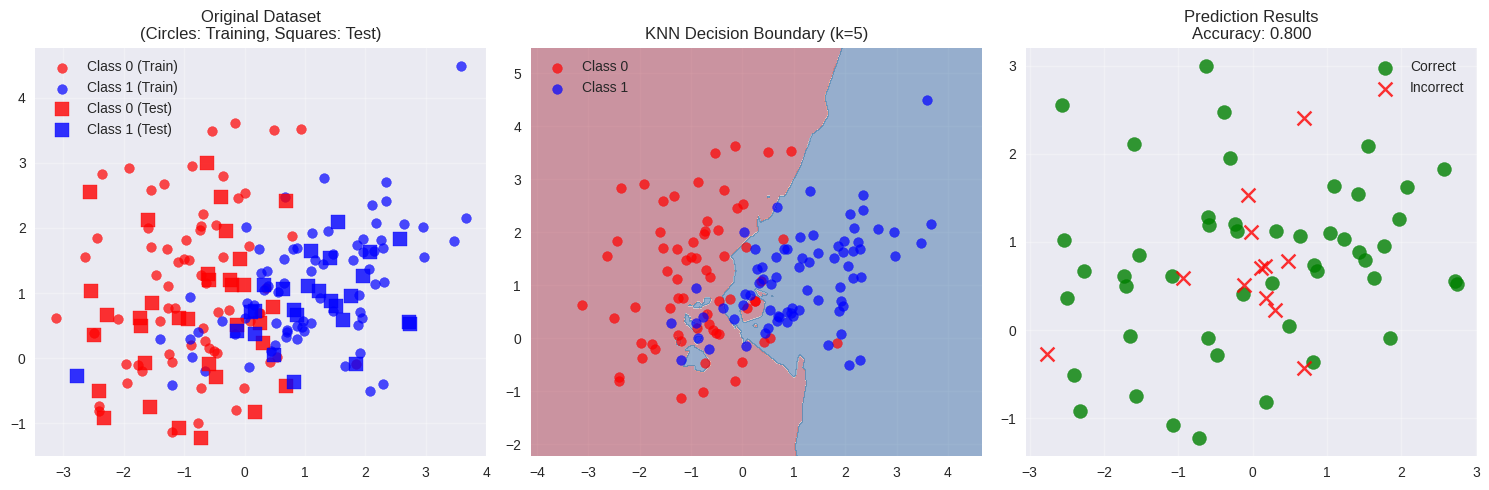

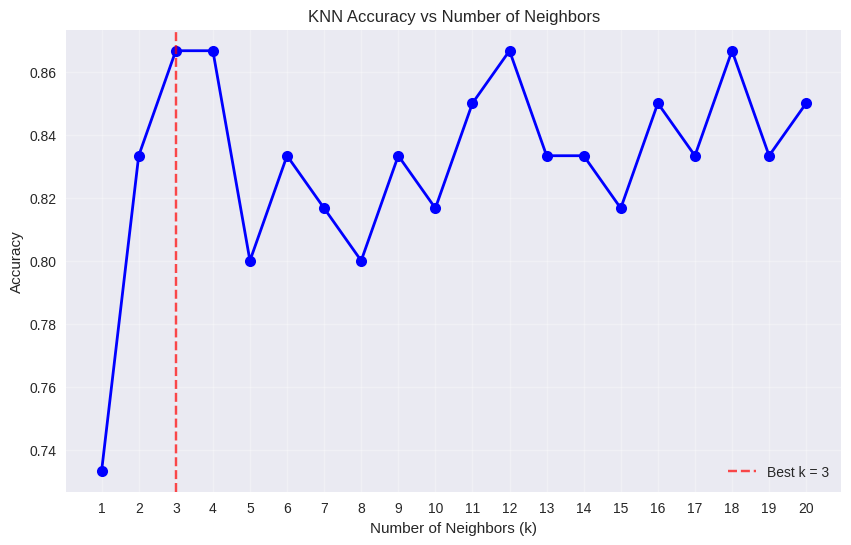


Best k value: 3 with accuracy: 0.867

Prediction for point [0, 0]: Class 1
Probabilities: Class 0: 0.400, Class 1: 0.600


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

# Generate a simple 2D dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with k={k}: {accuracy:.3f}")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Original dataset
axes[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
                c='red', marker='o', alpha=0.7, label='Class 0 (Train)')
axes[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
                c='blue', marker='o', alpha=0.7, label='Class 1 (Train)')
axes[0].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
                c='red', marker='s', s=100, alpha=0.8, label='Class 0 (Test)')
axes[0].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
                c='blue', marker='s', s=100, alpha=0.8, label='Class 1 (Test)')
axes[0].set_title('Original Dataset\n(Circles: Training, Squares: Test)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
axes[1].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
                c='red', marker='o', alpha=0.7, label='Class 0')
axes[1].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
                c='blue', marker='o', alpha=0.7, label='Class 1')
axes[1].set_title(f'KNN Decision Boundary (k={k})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Prediction results
correct = (y_test == y_pred)
axes[2].scatter(X_test[correct, 0], X_test[correct, 1],
                c='green', marker='o', s=100, alpha=0.8, label='Correct')
axes[2].scatter(X_test[~correct, 0], X_test[~correct, 1],
                c='red', marker='x', s=100, alpha=0.8, label='Incorrect')
axes[2].set_title(f'Prediction Results\nAccuracy: {accuracy:.3f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Test different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
best_k = k_values[np.argmax(accuracies)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7,
            label=f'Best k = {best_k}')
plt.legend()
plt.show()

print(f"\nBest k value: {best_k} with accuracy: {max(accuracies):.3f}")

# Example: Predict a new point
new_point = np.array([[0, 0]])
prediction = knn.predict(new_point)
probabilities = knn.predict_proba(new_point)

print(f"\nPrediction for point [0, 0]: Class {prediction[0]}")
print(f"Probabilities: Class 0: {probabilities[0][0]:.3f}, Class 1: {probabilities[0][1]:.3f}")

KNN CLASSIFICATION PIPELINE

1. DATA GENERATION AND UNDERSTANDING
----------------------------------------
Dataset shape: (300, 2)
Number of classes: 2
Class distribution: [150 150]
Feature 1 range: [-1.06, 2.96]
Feature 2 range: [-2.82, 2.89]


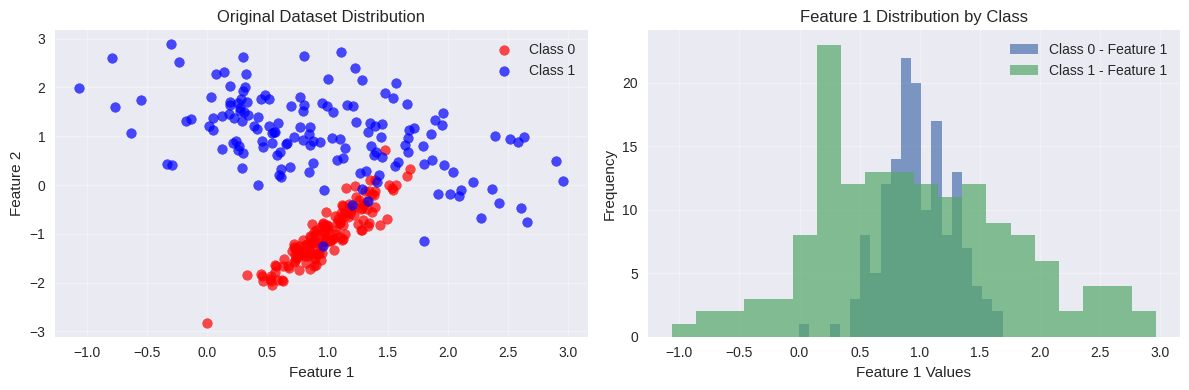


2. DATA PREPROCESSING AND TRAIN/TEST SPLIT
----------------------------------------
Training set shape: (210, 2)
Test set shape: (90, 2)
Training class distribution: [105 105]
Test class distribution: [45 45]


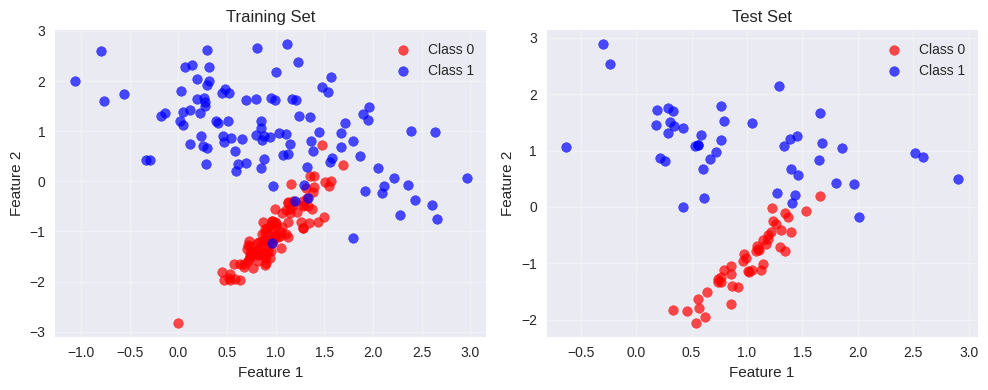


3. ELBOW METHOD - FINDING OPTIMAL K
----------------------------------------
Testing different k values...
k= 1: Train Acc=1.000, Test Acc=0.933
k= 2: Train Acc=0.967, Test Acc=0.944
k= 3: Train Acc=0.962, Test Acc=0.967
k= 4: Train Acc=0.957, Test Acc=0.967
k= 5: Train Acc=0.962, Test Acc=0.967
k= 6: Train Acc=0.952, Test Acc=0.967
k= 7: Train Acc=0.952, Test Acc=0.967
k= 8: Train Acc=0.948, Test Acc=0.967
k= 9: Train Acc=0.952, Test Acc=0.967
k=10: Train Acc=0.952, Test Acc=0.967
k=15: Train Acc=0.952, Test Acc=0.967
k=20: Train Acc=0.952, Test Acc=0.967
k=25: Train Acc=0.957, Test Acc=0.956
k=30: Train Acc=0.957, Test Acc=0.967

Optimal k: 17 with test accuracy: 0.978


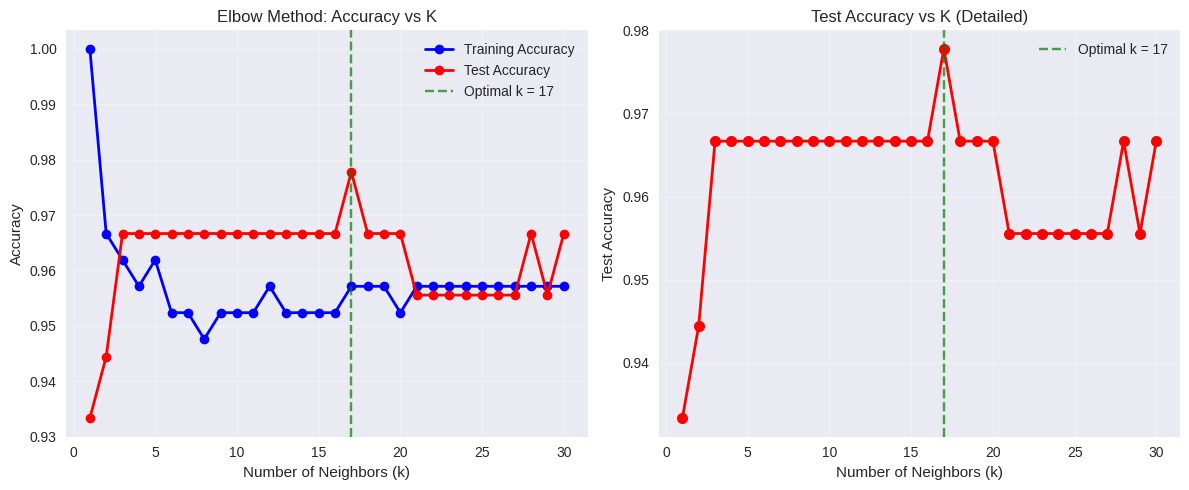


4. TRAINING FINAL MODEL WITH OPTIMAL K
----------------------------------------
Final KNN model trained with k=17
Model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}

5. MODEL EVALUATION AND VISUALIZATION
----------------------------------------
Final Model Accuracy: 0.978

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        45

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Confusion Matrix:
[[45  0]
 [ 2 43]]


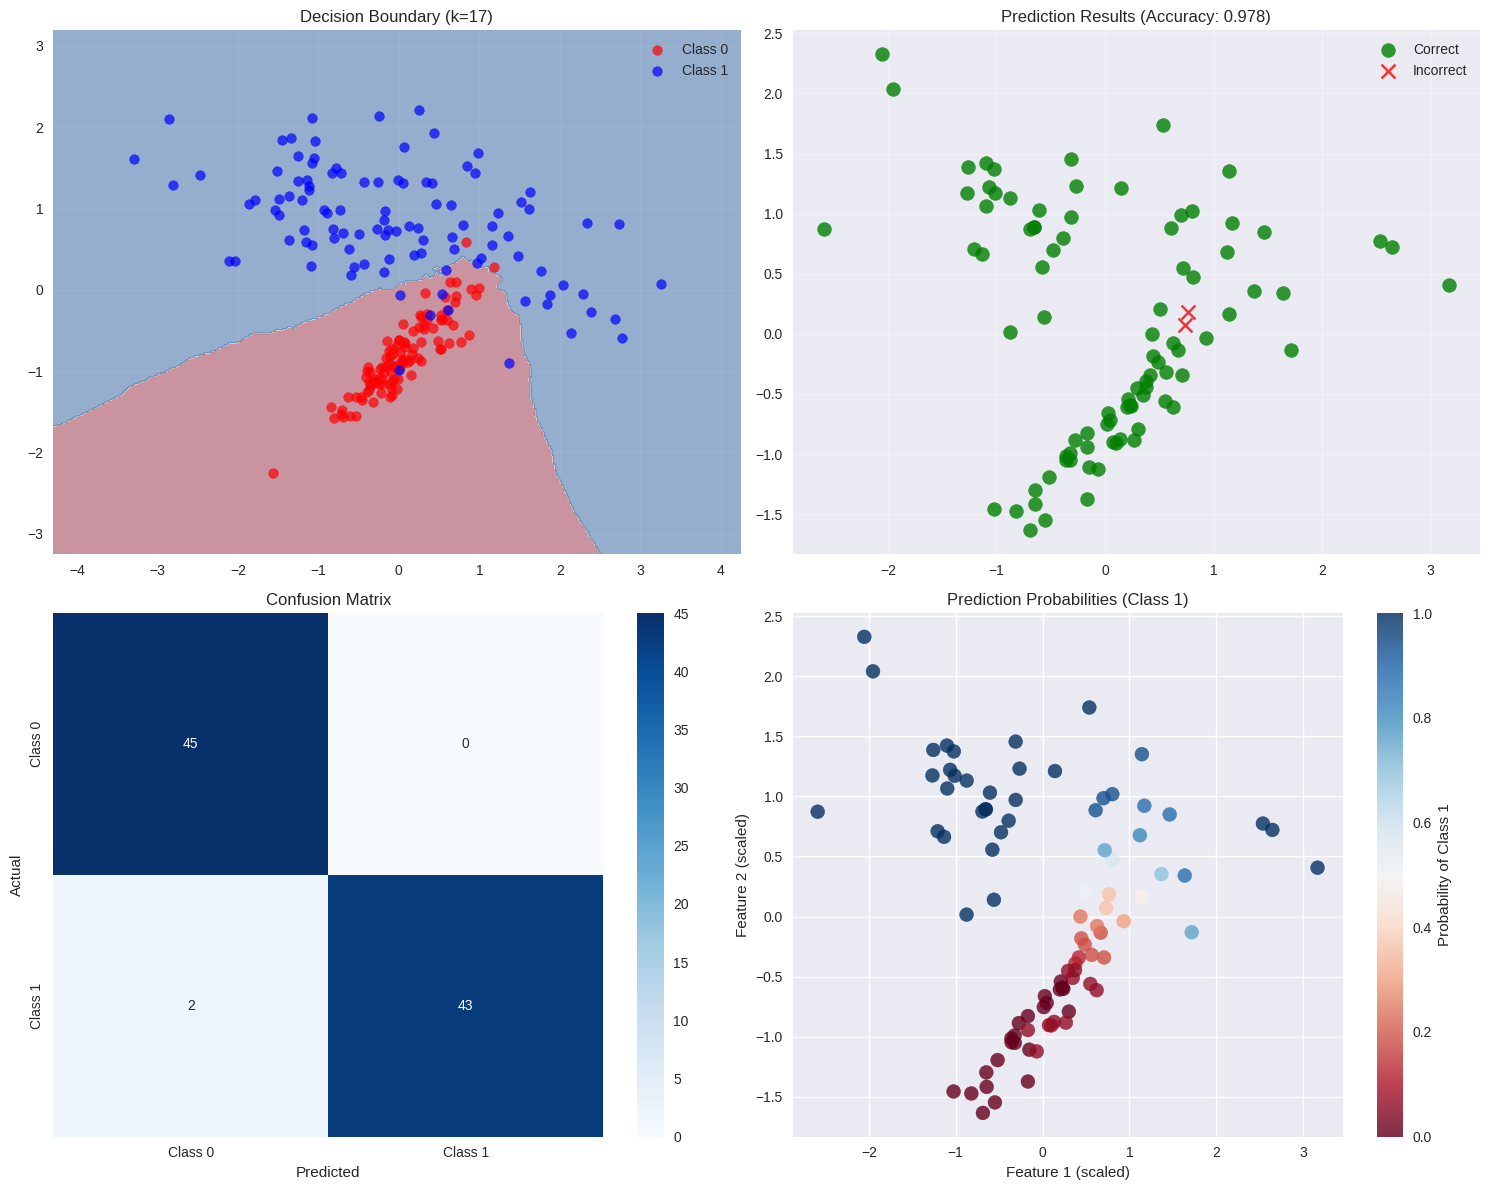


6. PREDICTIONS ON NEW DATA
----------------------------------------
Predictions for new data points:
------------------------------
Point 1: [0 0] -> Class 1 (Prob: 1.000)
Point 2: [1 1] -> Class 1 (Prob: 1.000)
Point 3: [-1 -1] -> Class 1 (Prob: 0.824)
Point 4: [ 2 -2] -> Class 0 (Prob: 0.471)


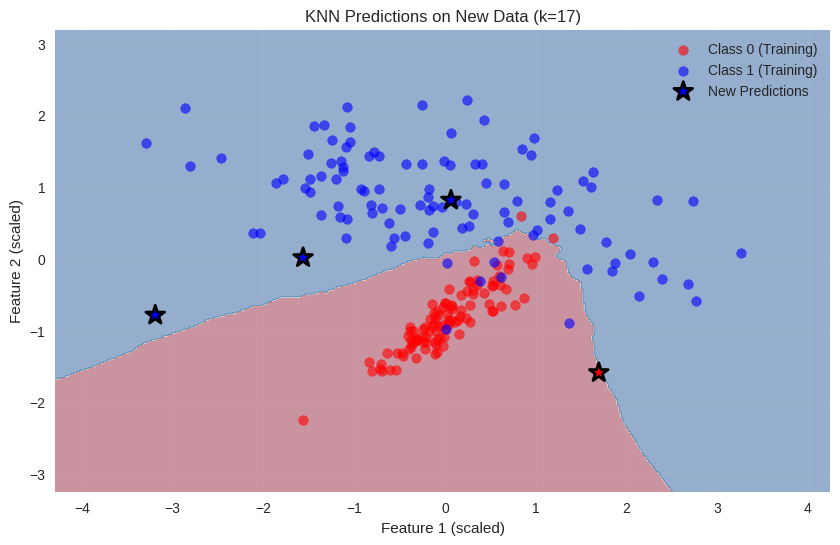


KNN ANALYSIS COMPLETE


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set style and random seed
plt.style.use('seaborn-v0_8')
np.random.seed(42)

print("="*60)
print("KNN CLASSIFICATION PIPELINE")
print("="*60)

# =============================================================================
# 1. DATA GENERATION AND UNDERSTANDING
# =============================================================================

print("\n1. DATA GENERATION AND UNDERSTANDING")
print("-" * 40)

# Generate dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Basic data information
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

# Visualize the dataset
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.7, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Dataset Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(X[y == 0, 0], alpha=0.7, label='Class 0 - Feature 1', bins=20)
plt.hist(X[y == 1, 0], alpha=0.7, label='Class 1 - Feature 1', bins=20)
plt.xlabel('Feature 1 Values')
plt.ylabel('Frequency')
plt.title('Feature 1 Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. DATA PREPROCESSING AND TRAIN/TEST SPLIT
# =============================================================================

print("\n2. DATA PREPROCESSING AND TRAIN/TEST SPLIT")
print("-" * 40)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# Visualize train/test split
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            c='red', alpha=0.7, label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            c='blue', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            c='red', alpha=0.7, label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            c='blue', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. ELBOW METHOD - FINDING OPTIMAL K
# =============================================================================

print("\n3. ELBOW METHOD - FINDING OPTIMAL K")
print("-" * 40)

# Test different k values
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

print("Testing different k values...")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if k <= 10 or k % 5 == 0:
        print(f"k={k:2d}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")

# Find optimal k
optimal_k = k_values[np.argmax(test_accuracies)]
best_test_acc = max(test_accuracies)

print(f"\nOptimal k: {optimal_k} with test accuracy: {best_test_acc:.3f}")

# Plot elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracies, 'b-o', label='Training Accuracy', linewidth=2)
plt.plot(k_values, test_accuracies, 'r-o', label='Test Accuracy', linewidth=2)
plt.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7,
            label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method: Accuracy vs K')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_values, test_accuracies, 'r-o', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7,
            label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs K (Detailed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. TRAINING FINAL MODEL WITH OPTIMAL K
# =============================================================================

print("\n4. TRAINING FINAL MODEL WITH OPTIMAL K")
print("-" * 40)

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

print(f"Final KNN model trained with k={optimal_k}")
print(f"Model parameters: {final_knn.get_params()}")

# =============================================================================
# 5. MODEL EVALUATION AND VISUALIZATION
# =============================================================================

print("\n5. MODEL EVALUATION AND VISUALIZATION")
print("-" * 40)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)
y_pred_proba = final_knn.predict_proba(X_test_scaled)

# Calculate metrics
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {final_accuracy:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Decision boundary
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = final_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0, 0].contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
axes[0, 0].scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
                   c='red', alpha=0.7, label='Class 0')
axes[0, 0].scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
                   c='blue', alpha=0.7, label='Class 1')
axes[0, 0].set_title(f'Decision Boundary (k={optimal_k})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Prediction results
correct = (y_test == y_pred)
axes[0, 1].scatter(X_test_scaled[correct, 0], X_test_scaled[correct, 1],
                   c='green', s=100, alpha=0.8, label='Correct')
axes[0, 1].scatter(X_test_scaled[~correct, 0], X_test_scaled[~correct, 1],
                   c='red', marker='x', s=100, alpha=0.8, label='Incorrect')
axes[0, 1].set_title(f'Prediction Results (Accuracy: {final_accuracy:.3f})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'], ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 4. Prediction probabilities
axes[1, 1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                   c=y_pred_proba[:, 1], cmap='RdBu', s=100, alpha=0.8)
axes[1, 1].set_title('Prediction Probabilities (Class 1)')
axes[1, 1].set_xlabel('Feature 1 (scaled)')
axes[1, 1].set_ylabel('Feature 2 (scaled)')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Probability of Class 1')

plt.tight_layout()
plt.show()

# =============================================================================
# 6. PREDICTIONS ON NEW DATA
# =============================================================================

print("\n6. PREDICTIONS ON NEW DATA")
print("-" * 40)

# Create some new data points for prediction
new_data = np.array([
    [0, 0],
    [1, 1],
    [-1, -1],
    [2, -2]
])

# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions
new_predictions = final_knn.predict(new_data_scaled)
new_probabilities = final_knn.predict_proba(new_data_scaled)

print("Predictions for new data points:")
print("-" * 30)
for i, (original, pred, prob) in enumerate(zip(new_data, new_predictions, new_probabilities)):
    print(f"Point {i+1}: {original} -> Class {pred} (Prob: {prob[1]:.3f})")

# Visualize new predictions
plt.figure(figsize=(10, 6))

# Plot decision boundary
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = final_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')

# Plot training data
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', alpha=0.6, label='Class 0 (Training)')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='blue', alpha=0.6, label='Class 1 (Training)')

# Plot new predictions
colors = ['red' if pred == 0 else 'blue' for pred in new_predictions]
plt.scatter(new_data_scaled[:, 0], new_data_scaled[:, 1],
            c=colors, marker='*', s=200, edgecolor='black',
            linewidth=2, label='New Predictions')

plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title(f'KNN Predictions on New Data (k={optimal_k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*60)
print("KNN ANALYSIS COMPLETE")
print("="*60)